# Introduction to ML

![welcome](https://media.tenor.com/UPziAk34JgwAAAP1/burn-elmo.mp4)

**Session Overview**

1. Basic Concepts of Machine Learning
2. Types of machine learning algorithms
4. Regression analysis
3. Model Selection and evaluation(cross-validation and performance metrics).

This section follows an **We discuss, I Do (My Demo), You Do (Student Exercise)** pattern depending on the complexity.

## DEFINITIONS!!!!!


In [ ]:
#@title What is ML?

# Learning patterns from data to make predictions or decisions.

![illustration](https://media.geeksforgeeks.org/wp-content/uploads/20250110153147721466/Machine-Learning-Techniques.webp)

Resource: https://www.geeksforgeeks.org/machine-learning/ml-machine-learning/

## Inputs

In [ ]:
#@title Types of Data

# 1. Structured(Tabular): Well-organized into rows & columns, Features are explicit.

# 2. Unstructured: No predefined schema (e.g. raw text, images, audio, video)


In [ ]:
#@title What is feature?

# a characteristic/pattern in data used make predictions or decisions.

In [ ]:
#@title Dataset roles

# 1. Training set: Used to fit the model

# 2. Validation set: Used to tune hyperparameters, select models

# 3. Test set: Held-out data for final performance evaluation

## Techniques and Outputs

# Types of ML Algorithm

![spe](http://www.techplayon.com/wp-content/uploads/2024/09/Machine_Learning_Types.png)

In [ ]:
#@title Evaluation metrics

# An evaluation metric is a quantitative measure used to assess how well a machine learning model performs on a given task.

# 1. Supervised Learning: Mean Squared Error (MSE), Mean Absolute Error (MAE), Accuracy, Precision etc

# 2. Unsupervised Learning: Silhouette Score, Explained Variance Ratio etc

# 3. Reinforcement Learning: Cumulative Reward, Success Rate etc

# Text models: Perplexity, BLEU etc.



## Regression

Regression algorithms walkthrough: https://colab.research.google.com/drive/1sYKxbKMayDBRWwcbhXjxAILqtYizk6Gq?usp=sharing

### End-to-end regression model building

Before we start:

Machine learning lifecycle

![Lifecycle](https://media.geeksforgeeks.org/wp-content/uploads/20250723180129985667/lifecycle.png)

We will now perform our first predictions. Consider [this data set](https://drive.google.com/file/d/1IyEq5BE0hyPpfcm7R8nZuY9bXqWcnIXX/view?usp=sharing) which tracks various information about grad school applicants, as well as their percentage chance of admission to grad school.

Our aim will be to predict one's chance of getting into grad school. Let's begin by taking a look at the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#load the data
data = pd.read_csv('adm_data.csv')

#displaying the dataset
data.shape

(400, 9)

In [ ]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
data.columns = ['Serial', 'GRE', 'TOEFL', 'Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'admit_chance']

Let's start by focusing on a single variable: the GRE score

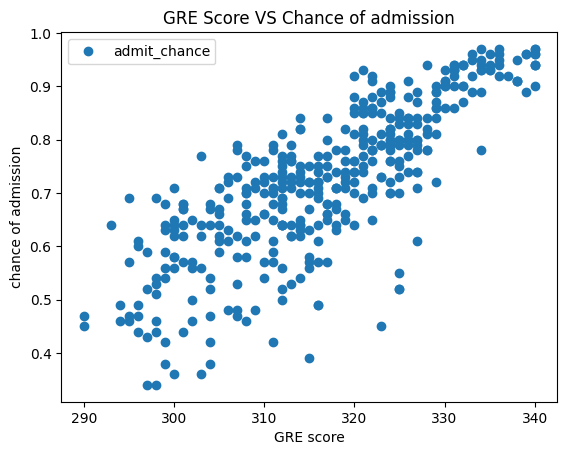

In [ ]:
data.plot(x='GRE', y='admit_chance', style='o')
plt.title('GRE Score VS Chance of admission')
plt.xlabel('GRE score')
plt.ylabel('chance of admission')
plt.show()

We can clearly see that there is a relationship between GRE scores and chances of admission. While there are some outliers, we will now build a linear regression model to predict admission chance based on GRE results. First, we set up our train and test datasets.

In [ ]:
from sklearn.model_selection import train_test_split

X = data['GRE'].values.reshape(-1, 1)
y = data['admit_chance'].values#.reshape(-1, 1)

# Use 20% of the data as test
# The rest will be our training set
GRE_train, GRE_test, admit_train, admit_test = train_test_split(X, y, test_size=0.2, random_state=0)

The fit method will look for our optimal line. More info on this method and others.

Official documentation https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit


In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(GRE_train, admit_train)


#display the intercept / bias
print(regressor.intercept_)

#display the coefficient
print(regressor.coef_)

-2.4807599906587905
[0.01012352]


How good is our newly fitted model? Let's feed it the data we saved for testing. We will have the model predict chances of admission based on those GRE scores we set aside, then compare that to the actual chances from the original dataset.

In [ ]:
admit_predict = regressor.predict(GRE_test)

comparison_frame = pd.DataFrame({'Actual': admit_test.flatten(), 'Predicted': admit_predict.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,80.000000,80.000000
mean,0.715125,0.725612
std,0.135637,0.110252
min,0.390000,0.495555
25%,0.627500,0.662593
50%,0.720000,0.718273
75%,0.802500,0.809384
max,0.950000,0.940990


Our model is not too bad, although you can see that it can be off, as with the min value. Let's visualize it for a better intuition

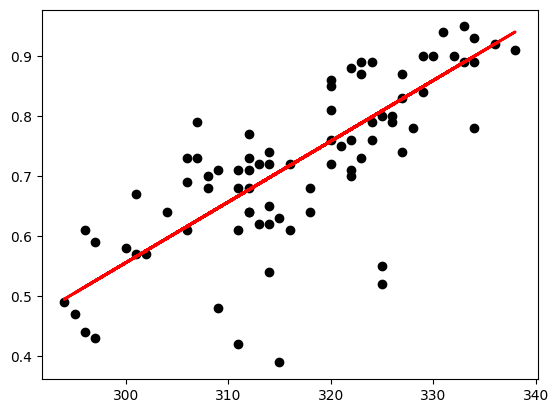

In [ ]:
plt.scatter(GRE_test, admit_test, color='black')
plt.plot(GRE_test, admit_predict, color='red', linewidth=2)
plt.show()

We have some outliers, but our line is nicely centered. While visualizations like this are helpful in assessing our line of best fit, sklearn comes with some crucial metrics for linear regressions

In [ ]:
from sklearn import metrics

# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(admit_test, admit_predict))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(admit_test, admit_predict))

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(admit_test, admit_predict)))

Mean Absolute Error: 0.06577018755736426
Mean Squared Error: 0.008254091184558793
Root Mean Squared Error: 0.09085202906131923


How do we make sense of the numbers above? You shoud read through [this article](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d) for formal definitions of the metrics above, but bear in mind the following:



*   We will use these metrics (particularly RMSE) to compare models to each other. The lower the value the better.
*   These values are relative to our dependent variable, i.e our dependent variable ranges from 0.39 to 0.96, with a mean of 0.7 and standard deviation of 0.13. This makes an RMSE of 0.085 somewhat acceptable. If our data ranged from 0 to 10, an RMSE of 0.085 would be incredible!

Let's see if we can improve our model by bringing in new independent variables. Let's start by plotting TOEFL scores against admission chance

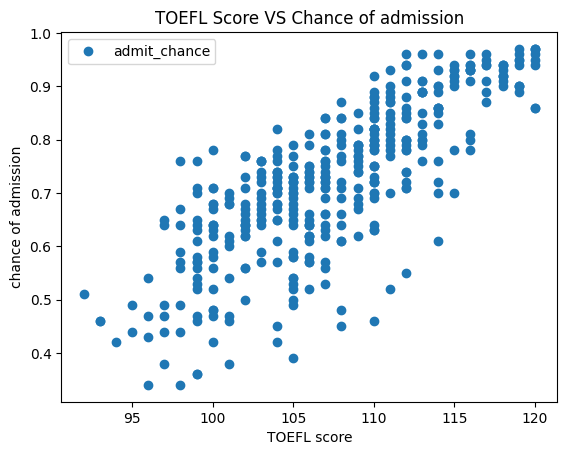

In [ ]:
data.plot(x='TOEFL', y='admit_chance', style='o')
plt.title('TOEFL Score VS Chance of admission')
plt.xlabel('TOEFL score')
plt.ylabel('chance of admission')
plt.show()

Once again, we can see that there is a relationship between TOEFL score and chance of admission. Let's perform a multivariate linear regression using both GRE and TOEFL scores as independent variables.

In [ ]:
X = data[['GRE', 'TOEFL']].values
y = data['admit_chance'].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# find optimal coefficients and intercept
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

It is interesting at this point to check the coefficients used by our model, as they indicate how heavily each independent variable contributes to the dependent variable

In [ ]:
regressor.coef_

array([0.00631956, 0.00870874])

In this case, we can see that a single point change in your Toefl score would influence your chances slightly more than a similar 1 point change in GRE scores.

At this point, let's compare our predicted results to the actual data from the test set:

In [ ]:
y_pred = regressor.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()


,Actual,Predicted
count,80.000000,80.000000
mean,0.715125,0.724671
std,0.135637,0.116483
min,0.390000,0.474050
25%,0.627500,0.644872
50%,0.720000,0.707336
75%,0.802500,0.803960
max,0.950000,0.943703


In [ ]:
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.058929749037738385
Mean Squared Error: 0.006816077266875634
Root Mean Squared Error: 0.08255953770991958
